# 什么是Pytorch？

Pytorch是一个基于Python的科学计算库，它有以下特点：\
（1）类似于Numpy,但它可以使用GPU\
（2）它可以定义深度学习模型，可以灵活地进行深度学习模型的训练和使用

Tensors\
Tensor类似于Numpy的ndarray,唯一的区别是Tensor可以在GPU上加速运算

# 内容一：Pytorch初识

In [46]:
import torch
import torchvision

tensor的构建：
- 构建一个未初始化的5$\times$3矩阵
- 构建一个随机初始化的矩阵
- 构建一个全部为0，类型为long的矩阵
- 从数据直接构建tensor
- 也可以从一个已有的tensor构建一个tensor。这些方法会重用原来tensor的特征，例如数据类型
- 产生跟原来数据相同形状的tensor

In [2]:
x = torch.empty(5,3)
x = torch.rand(5,3)
x = torch.zeros(5,3,dtype=torch.long) # x = torch.zeros(5,3).long()
x = torch.tensor([5.5,3])
y = x.new_ones(5,3)
y = torch.randn_like(x) # x.shape

Tensor的运算：
- 加法运算（note: 任何in-place运算都会以_结尾，例如x.copy_(y)）
- 各类的Numpy的index操作都可以在tensor上使用
- Resize操作，使用.view()
- 如果只有一个元素的tensor，使用.item()方法可以把里面的value变成Python数值

In [3]:
x = torch.rand(4,4)
y = torch.rand(4,4)
# for add
x + y # torch.add(x,y)
y.add_(x) # in-place加法
# for index
x[1:,1:]
# for resize
z = x.view(16)
z = x.view(2,-1)
# pick up the value
single_x = torch.randn(1)
single_x.item()

0.857677698135376

Numpy与Tensor之间的转化

In [4]:
import numpy as np

# tensor转numpy
a = torch.ones(5)
b = a.numpy()

# numpy转tensor
a = np.ones(5)
b = torch.from_numpy(a)

# 内容二：利用numpy实现两层神经网络

用该程序帮我们复习BP算法\
一个全连接ReLU神经网络，一个隐含层，没有bias，使用L2 Loss
- $h = W_1X+b_1$
- $a = max(0,h)$
- $y_{hat} = W_2a+b_2$

numpy ndarray是一个普通的n维array，它不知道任何关于深度学习或者梯度（gradient）的知识，也不知道计算图（computation graph），只是一种用来计算数学运算的数据结构

In [5]:
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = np.random.randn(N,D_in) # random initialize some data
y = np.random.randn(N,D_out) # random initialize the label of the data
w1 = np.random.randn(D_in,H) # 初始化权重
w2 = np.random.randn(H,D_out)
learning_rate = 1e-6
for it in range(500):
    # forward pass，compute the output
    h = x.dot(w1) # N * H
    h_relu = np.maximum(h,0) # N * H
    y_pred = h_relu.dot(w2) # N * D_out
    # compute loss
    loss = np.square(y_pred-y).sum()
    print(it,loss)
    # BP - compute the gradient
    grad_y_pred = 2.0 * (y_pred-y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2   

0 40088235.894467406
1 44527573.90244298
2 48548036.03070414
3 42294579.09278238
4 26327729.630211607
5 12143817.604598908
6 5122458.8034188
7 2555452.1781873633
8 1632667.882439468
9 1228379.7936123644
10 996536.7946562885
11 834533.8522038049
12 709593.1944716278
13 608940.0884307264
14 526264.6516064466
15 457461.30422355107
16 399607.7170976832
17 350585.1858410897
18 308885.45678191504
19 273194.56440439884
20 242500.42328567978
21 215963.62899565249
22 192913.58005190906
23 172801.28013897763
24 155195.98203825427
25 139773.25617922292
26 126204.5046954268
27 114211.62051651049
28 103565.08404692315
29 94098.02534731952
30 85661.69754257068
31 78122.9241038298
32 71374.10769923545
33 65309.79926155526
34 59854.292981358216
35 54930.0093163001
36 50479.40022524027
37 46450.65961300107
38 42798.278898425306
39 39479.80386765815
40 36459.15890072062
41 33707.76246767792
42 31197.670045049585
43 28902.486148488828
44 26801.7821224815
45 24880.4590167376
46 23119.187971489086
47 21501

393 0.005381252823143906
394 0.005183104799138945
395 0.004992377963557943
396 0.004808607282431614
397 0.004631666748928511
398 0.0044613501398727265
399 0.004297260986766893
400 0.004139267431533457
401 0.00398722056059073
402 0.003840715969727972
403 0.003699658058765959
404 0.003563818657137282
405 0.003432967969926242
406 0.0033069748083512885
407 0.003185677597132025
408 0.0030688521452060624
409 0.0029563208617703674
410 0.0028479298108942137
411 0.0027435487836072053
412 0.0026430351847164576
413 0.002546221630214284
414 0.0024529879936895736
415 0.002363173150781569
416 0.0022766586478643294
417 0.0021933667199267276
418 0.0021131147822416444
419 0.0020358106429114132
420 0.0019614090412556134
421 0.001889713148760075
422 0.0018206617371556888
423 0.0017541766859609864
424 0.0016900882017657423
425 0.0016283569262977556
426 0.0015689012925445768
427 0.0015116208929133097
428 0.0014564499631958927
429 0.0014033105272548078
430 0.0013521179902719017
431 0.001302805791800932
432 

# 内容三：利用Tensors实现两层神经网络

利用tensors来创建前向神经网络，计算损失以及反向传播

Tensor: 一个Pytorch Tensor很像一个numpy的ndarray，但是它和numpy ndarray最大的区别是，Pytorch Tensor可以再CPU或者GPU上运算。如果想在GPU上运算，就需要把Tensor换成cuda类型

Autograd: Pytorch的一个重要功能就是autograd，也就是说只要定义了forward pass（前向神经网络），计算了Loss之后，Pytorch可以自动求导计算模型所有参数的梯度。

要想计算某个Tensor x 的梯度需要x.requires_grad = True,那么x.grad存储着x当前梯度

# 子内容一：直接用Tensor替换numpy

In [6]:
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # x = np.random.randn(N,D_in)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)
w1 = torch.randn(D_in,H) # w1 = np.random.randn(D_in,H)
w2 = torch.randn(H,D_out) # w2 = np.random.randn(H,D_out)
learning_rate = 1e-6
for it in range(500):
    # forward pass
    h = x.mm(w1) # N * H      h = x.dot(w1)
    h_relu = h.clamp(min=0) # N * H     np.maximum(h,0)
    y_pred = h_relu.mm(w2) # N * D_out     h_relu.dot(w2)  
    # compute loss
    loss = (y_pred - y).pow(2).sum() # np.square(y_pred-y).sum()
    print(it,loss.item()) #  print(it,loss)    
    # BP - compute the gradient
    grad_y_pred = 2.0 * (y_pred-y)
    grad_w2 = h_relu.t().mm(grad_y_pred) # h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())  # grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.clone() # grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h) # x.T.dot(grad_h)    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 37553648.0
1 37806440.0
2 41784296.0
3 41186092.0
4 31929406.0
5 18693296.0
6 8969722.0
7 4228050.0
8 2307684.75
9 1520290.0
10 1144686.75
11 924972.9375
12 772927.8125
13 656984.3125
14 564163.25
15 487841.28125
16 424160.28125
17 370535.46875
18 325098.6875
19 286311.40625
20 253008.96875
21 224320.453125
22 199504.015625
23 177904.328125
24 159049.40625
25 142555.15625
26 128049.390625
27 115270.5703125
28 103969.859375
29 93943.5703125
30 85028.015625
31 77085.4140625
32 69993.3125
33 63645.296875
34 57952.3203125
35 52847.44140625
36 48256.9140625
37 44119.328125
38 40381.2578125
39 36999.9375
40 33938.328125
41 31160.73828125
42 28638.7265625
43 26344.462890625
44 24254.529296875
45 22348.97265625
46 20609.91796875
47 19021.359375
48 17568.359375
49 16240.06640625
50 15022.8056640625
51 13905.7490234375
52 12880.166015625
53 11938.3623046875
54 11071.80859375
55 10274.1318359375
56 9539.3916015625
57 8862.25
58 8237.5517578125
59 7660.9033203125
60 7128.029296875
61 6635.415039

456 8.576175605412573e-05
457 8.44839378260076e-05
458 8.29489654279314e-05
459 8.181091834558174e-05
460 8.037532825255767e-05
461 7.899483171058819e-05
462 7.761841698084027e-05
463 7.63998250477016e-05
464 7.530314178438857e-05
465 7.398086745524779e-05
466 7.283168088179082e-05
467 7.15796195436269e-05
468 7.064661622280255e-05
469 6.930513336556032e-05
470 6.829711492173374e-05
471 6.743770791217685e-05
472 6.636670877924189e-05
473 6.530812970595434e-05
474 6.434461829485372e-05
475 6.36131881037727e-05
476 6.262854731176049e-05
477 6.180984928505495e-05
478 6.085295899538323e-05
479 6.025855691405013e-05
480 5.9340680309105664e-05
481 5.8403828006703407e-05
482 5.772855365648866e-05
483 5.68704454053659e-05
484 5.621413583867252e-05
485 5.5552540288772434e-05
486 5.4792242735857144e-05
487 5.41671943210531e-05
488 5.345771569409408e-05
489 5.275832882034592e-05
490 5.203133332543075e-05
491 5.109274934511632e-05
492 5.057993985246867e-05
493 4.97802029713057e-05
494 4.9067613872

# 子内容二：用Tensor的autograd直接计算梯度
Tensor + autograd

Tensor可以自动帮我们计算BP

In [27]:
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # x = np.random.randn(N,D_in)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)
w1 = torch.randn(D_in,H, requires_grad=True) # w1 = np.random.randn(D_in,H)
w2 = torch.randn(H,D_out, requires_grad=True) # w2 = np.random.randn(H,D_out)
learning_rate = 1e-6
for it in range(500):
    # forward pass
    h = x.mm(w1) # N * H      h = x.dot(w1)
    h_relu = h.clamp(min=0) # N * H     np.maximum(h,0)
    y_pred = h_relu.mm(w2) # N * D_out     h_relu.dot(w2)  
    # compute loss
    loss = (y_pred - y).pow(2).sum() # np.square(y_pred-y).sum()
    print(it,loss.item()) #  print(it,loss)    
    # BP - compute the gradient
    loss.backward()
    with torch.no_grad():
#         不能使用w1 = w1 - xxx，这样会导致没有梯度信息
#         w1 = w1 - learning_rate * w1.grad
#         w2 = w2 - learning_rate * w2.grad
        w1-=learning_rate*w1.grad
        w2-=learning_rate*w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

0 26219924.0
1 20195416.0
2 18335570.0
3 17759974.0
4 16947160.0
5 15016812.0
6 12115446.0
7 8849736.0
8 6019118.0
9 3914745.25
10 2534628.75
11 1674920.25
12 1154303.75
13 835503.5
14 635032.75
15 503066.84375
16 411776.5
17 345234.25
18 294387.0
19 254070.0625
20 221160.9375
21 193873.625
22 170826.796875
23 151143.21875
24 134205.546875
25 119552.8671875
26 106794.5234375
27 95644.890625
28 85873.9765625
29 77276.9375
30 69680.59375
31 62950.7421875
32 57000.3984375
33 51710.19921875
34 46993.4765625
35 42780.85546875
36 39007.0390625
37 35622.5625
38 32582.32421875
39 29842.55078125
40 27373.921875
41 25140.46875
42 23116.830078125
43 21280.525390625
44 19612.240234375
45 18094.34765625
46 16710.7421875
47 15447.658203125
48 14292.833984375
49 13236.2177734375
50 12268.59375
51 11380.8046875
52 10565.3447265625
53 9815.853515625
54 9125.7802734375
55 8490.2744140625
56 7904.2138671875
57 7364.400390625
58 6865.6435546875
59 6404.37451171875
60 5977.52783203125
61 5582.63037109375
6

384 0.0005940395058132708
385 0.0005747669492848217
386 0.0005556970136240125
387 0.0005383788957260549
388 0.0005216802237555385
389 0.0005042419652454555
390 0.0004896170576103032
391 0.00047295240801759064
392 0.00045831577153876424
393 0.0004444981459528208
394 0.0004300002474337816
395 0.00041756435530260205
396 0.00040473617264069617
397 0.00039270881097763777
398 0.000380895275156945
399 0.00036892807111144066
400 0.0003585137892514467
401 0.0003474144614301622
402 0.00033766450360417366
403 0.00032751073013059795
404 0.0003183862427249551
405 0.00030857641831971705
406 0.0002995487302541733
407 0.0002910059702116996
408 0.0002831039601005614
409 0.00027571944519877434
410 0.0002678060263860971
411 0.00026004904066212475
412 0.00025268306490033865
413 0.0002458573435433209
414 0.00023944269923958927
415 0.00023353355936706066
416 0.00022754167730454355
417 0.0002217744040535763
418 0.00021629067487083375
419 0.00021040842693764716
420 0.00020532359485514462
421 0.000199915491975

# 子内容三：利用Pytorch的nn库来构建网络
Tensor + autograd + nn

In [31]:
import torch.nn as nn
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # x = np.random.randn(N,D_in)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)
model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out)
)
loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-4
for it in range(500):
    # forward pass
    y_pred = model(x)
    # compute loss
    loss = loss_fn(y_pred, y)
    print(it,loss.item()) #  print(it,loss)    
    # BP - compute the gradient
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    model.zero_grad()

0 675.1594848632812
1 625.4242553710938
2 582.6050415039062
3 544.53173828125
4 510.7986755371094
5 480.5467529296875
6 452.9770202636719
7 427.79278564453125
8 404.6474609375
9 383.08697509765625
10 362.7210998535156
11 343.6646423339844
12 325.8309631347656
13 309.01995849609375
14 292.98992919921875
15 277.7380676269531
16 263.25164794921875
17 249.47509765625
18 236.2825164794922
19 223.76805114746094
20 211.8094024658203
21 200.42637634277344
22 189.55226135253906
23 179.1944122314453
24 169.35800170898438
25 159.9930419921875
26 151.1016082763672
27 142.64385986328125
28 134.59983825683594
29 126.93629455566406
30 119.65534210205078
31 112.7513427734375
32 106.20663452148438
33 99.9957504272461
34 94.1103744506836
35 88.5485610961914
36 83.29818725585938
37 78.34452819824219
38 73.67308807373047
39 69.26549530029297
40 65.10907745361328
41 61.19390106201172
42 57.51030349731445
43 54.039955139160156
44 50.77492141723633
45 47.708030700683594
46 44.83177947998047
47 42.13348007202

402 0.0001169173774542287
403 0.00011371225264156237
404 0.00011059538519475609
405 0.00010756657866295427
406 0.00010461846250109375
407 0.00010175828356295824
408 9.897792187985033e-05
409 9.626928658690304e-05
410 9.363352000946179e-05
411 9.10780145204626e-05
412 8.859112131176516e-05
413 8.617169078206643e-05
414 8.382194937439635e-05
415 8.153346425388008e-05
416 7.931161962915212e-05
417 7.714982348261401e-05
418 7.504853419959545e-05
419 7.300570723600686e-05
420 7.10153763066046e-05
421 6.908470822963864e-05
422 6.720631063217297e-05
423 6.538002344314009e-05
424 6.360247061820701e-05
425 6.187038525240496e-05
426 6.0194008256075904e-05
427 5.8558653108775616e-05
428 5.6970024161273614e-05
429 5.5426149629056454e-05
430 5.392169259721413e-05
431 5.24584211234469e-05
432 5.1036149670835584e-05
433 4.9654314352665097e-05
434 4.83085896121338e-05
435 4.7001503844512627e-05
436 4.5731303544016555e-05
437 4.449301559361629e-05
438 4.329051444074139e-05
439 4.2120442230952904e-05
44

# 子内容四：利用Pytorch的optim来更新参数
Tensor + autograd + nn + optim

不用手动更新模型的weights，使用optim来帮助我们更新参数。optim这个package提供了各种不同的模型优化算法，包括SGD，Momentum，Adam等

In [42]:
import torch.nn as nn
import torch.optim as optim
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # x = np.random.randn(N,D_in)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)
model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out)
)
loss_fn = nn.MSELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
learning_rate = 1e-2
for it in range(500):
    optimizer.zero_grad()
    # forward pass
    y_pred = model(x)
    # compute loss
    loss = loss_fn(y_pred, y)
    print(it,loss.item()) #  print(it,loss)    
    # BP - compute the gradient
    loss.backward()
    optimizer.step()

0 598.65185546875
1 552.7710571289062
2 478.63861083984375
3 395.796875
4 317.5699462890625
5 250.2915802001953
6 193.88536071777344
7 147.5671844482422
8 110.0562744140625
9 81.06160736083984
10 61.31023406982422
11 51.85138702392578
12 51.8131103515625
13 56.21391296386719
14 58.140506744384766
15 53.652870178222656
16 44.59501647949219
17 35.475074768066406
18 28.872905731201172
19 24.134151458740234
20 19.94232940673828
21 16.559667587280273
22 15.170623779296875
23 15.938117980957031
24 17.452350616455078
25 17.960464477539062
26 16.798519134521484
27 14.612993240356445
28 12.454473495483398
29 10.79928207397461
30 9.395467758178711
31 7.8965277671813965
32 6.429311752319336
33 5.465423583984375
34 5.206448554992676
35 5.288646221160889
36 5.147909641265869
37 4.579889297485352
38 3.855830669403076
39 3.320941686630249
40 3.0231716632843018
41 2.7600560188293457
42 2.396416425704956
43 2.016101121902466
44 1.7804995775222778
45 1.7131595611572266
46 1.6792911291122437
47 1.5473544

342 2.4075381445387567e-12
343 2.3481689682969265e-12
344 2.3694089225367865e-12
345 2.2899759345718085e-12
346 2.3052172150317407e-12
347 2.2936431400000235e-12
348 2.3294859964606562e-12
349 2.359784676692067e-12
350 2.4572180228055185e-12
351 2.5704633734024984e-12
352 2.5100915269915536e-12
353 2.403260316446998e-12
354 2.2575817083814176e-12
355 2.2189043137610387e-12
356 2.118966894310015e-12
357 2.295919097200505e-12
358 2.1215932656526437e-12
359 2.003250430121506e-12
360 2.0197268336963337e-12
361 2.0744113891912885e-12
362 2.072732176866543e-12
363 2.1862130161753868e-12
364 2.2217570665172826e-12
365 2.068316871939313e-12
366 2.0365892132445662e-12
367 1.9703579046126407e-12
368 1.96718466169421e-12
369 1.9921607766204552e-12
370 2.0771852120293754e-12
371 2.069902842877225e-12
372 2.2231075487433305e-12
373 2.2308305376583792e-12
374 2.210877748237694e-12
375 2.0765988754944953e-12
376 1.9925237675078034e-12
377 2.0413571007182885e-12
378 2.0413701111443583e-12
379 2.146516

# 子内容五：利用类来完成网络构建
Tensor + autograd + nn + optim + class

In [47]:
import torch.nn as nn
import torch.optim as optim
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H, D_out)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
net = Net()
learning_rate = 1e-4
# 创建一个随机梯度下降（stochastic gradient descent）优化器
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# 创建一个损失函数
loss_fn = nn.MSELoss(reduction='sum')
x = torch.randn(N,D_in) # x = np.random.randn(N,D_in)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)

for it in range(500):
    optimizer.zero_grad()
    y_pred = net(x)
    loss = loss_fn(y_pred, y)
    print(it, loss.item())
    loss.backward()
    optimizer.step()

0 700.8240966796875
1 645.8521728515625
2 557.4697875976562
3 460.15380859375
4 369.41815185546875
5 291.2198181152344
6 225.88540649414062
7 172.34292602539062
8 130.1055908203125
9 98.36099243164062
10 77.2099609375
11 67.07637023925781
12 66.30437469482422
13 69.04097747802734
14 68.10496520996094
15 60.53375244140625
16 49.607303619384766
17 40.068359375
18 33.4702262878418
19 28.41788101196289
20 24.043540954589844
21 21.236553192138672
22 20.811229705810547
23 21.858552932739258
24 22.397615432739258
25 21.19217300415039
26 18.651247024536133
27 16.010547637939453
28 13.98787784576416
29 12.378358840942383
30 10.724827766418457
31 9.099250793457031
32 7.969805717468262
33 7.4918622970581055
34 7.215818881988525
35 6.60507869720459
36 5.638719081878662
37 4.729047775268555
38 4.1626105308532715
39 3.8216404914855957
40 3.4543449878692627
41 3.029071807861328
42 2.709925889968872
43 2.577078342437744
44 2.5064992904663086
45 2.3327465057373047
46 2.0415539741516113
47 1.75419902801

368 2.5514393115627643e-12
369 2.6506169221313103e-12
370 2.874413597767078e-12
371 2.6270350911988816e-12
372 2.682129908795905e-12
373 2.6733175135379428e-12
374 2.8250294898529704e-12
375 2.9224654380516357e-12
376 2.916161452939936e-12
377 2.955192731149414e-12
378 2.9631863369267153e-12
379 2.851164833742037e-12
380 2.788416416169004e-12
381 2.815783413726014e-12
382 2.8398474977847643e-12
383 2.8582147499484067e-12
384 2.8726060159051103e-12
385 2.749593304776643e-12
386 2.6408053261511855e-12
387 2.6512691781582776e-12
388 2.6018902744145977e-12
389 2.7020046356601712e-12
390 2.7332296582277538e-12
391 2.937108238912356e-12
392 2.8412578279707335e-12
393 2.5986116470450016e-12
394 2.429916727900161e-12
395 2.1861395072680923e-12
396 2.1399611683375896e-12
397 2.3472883792924337e-12
398 2.3820192780049654e-12
399 2.433269948379224e-12
400 2.3866613980266793e-12
401 2.52140083985275e-12
402 2.527590333215035e-12
403 2.526688277007527e-12
404 2.4608242960716398e-12
405 2.4467140553

# 拓展代码

## 不同优化器对比

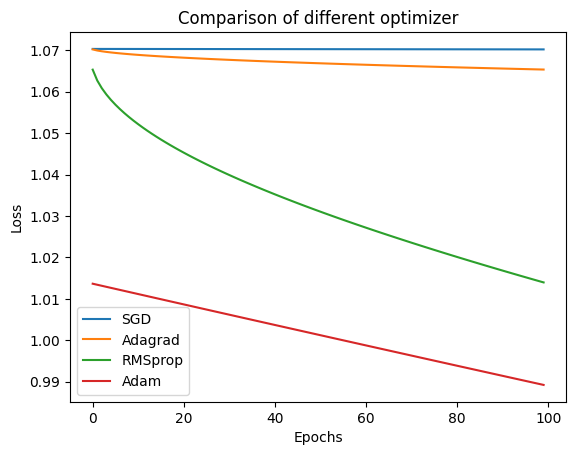

In [135]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H, D_out)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
net = Net()
learning_rate = 1e-6
# 创建一个随机梯度下降（stochastic gradient descent）优化器
optimizer_list = [
    optim.SGD(net.parameters(), lr=learning_rate),
    optim.Adagrad(net.parameters(), lr=learning_rate),
    optim.RMSprop(net.parameters(), lr=learning_rate),
    optim.Adam(net.parameters(), lr=learning_rate)
]
optimizer_list_zh = ["SGD", "Adagrad", "RMSprop", "Adam"]
# optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# 创建一个损失函数
# loss_fn_list = [nn.MSELoss(), nn.L1Loss(), nn.CrossEntropyLoss()]
loss_fn = nn.MSELoss(reduction='mean')
x = torch.randn(N,D_in) # x = np.random.randn(N,D_in)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)

loss_list = []
for optimizer in optimizer_list:
    loss_ = []
    for it in range(100):
        optimizer.zero_grad()
        y_pred = net(x)
        loss = loss_fn(y_pred, y)
        loss_.append(loss.item())
    #     print(it, loss.item())
        loss.backward()
        optimizer.step()
    loss_list.append(loss_)

for i in range(len(optimizer_list_zh)):
    plt.plot(loss_list[i], label=optimizer_list_zh[i])
plt.legend()
plt.title("Comparison of different optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## 不同优化器在不同学习率下的对比

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:37<00:00,  4.19s/it]


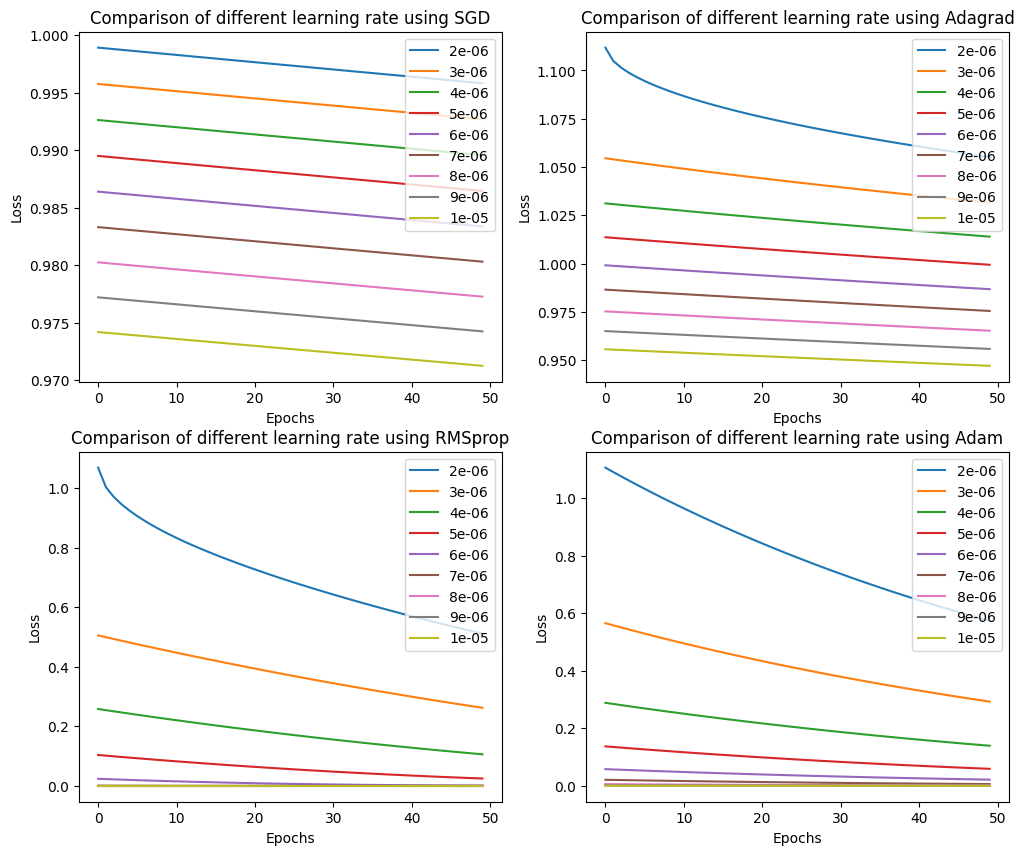

In [138]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H, D_out)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
net = Net()
learning_rate_list = [2e-6, 3e-6, 4e-6, 5e-6, 6e-6, 7e-6, 8e-6, 9e-6, 1e-5]
# 创建一个随机梯度下降（stochastic gradient descent）优化器
optimizer_list = [
    optim.SGD(net.parameters(), lr=learning_rate),
    optim.Adagrad(net.parameters(), lr=learning_rate),
    optim.RMSprop(net.parameters(), lr=learning_rate),
    optim.Adam(net.parameters(), lr=learning_rate)
]
optimizer_list_zh = ["SGD", "Adagrad", "RMSprop", "Adam"]
# optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# 创建一个损失函数
# loss_fn_list = [nn.MSELoss(), nn.L1Loss(), nn.CrossEntropyLoss()]

plt.figure(figsize=(12,10))
for opt_id in range(len(optimizer_list)):
    optimizer = optimizer_list[opt_id]
    loss_fn = nn.MSELoss(reduction='mean')
    x = torch.randn(N,D_in) # x = np.random.randn(N,D_in)
    y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)

    loss_list = []
    for learning_rate in tqdm(learning_rate_list):
        loss_ = []
        for it in range(500):
            optimizer.zero_grad()
            y_pred = net(x)
            loss = loss_fn(y_pred, y)
            if it % 10 == 0:
                loss_.append(loss.item())
        #     print(it, loss.item())
            loss.backward()
            optimizer.step()
        loss_list.append(loss_)
    
    plt.subplot(2,2,opt_id+1)
    for i in range(len(learning_rate_list)):
        plt.plot([x for x in range(0, 500, 10)], loss_list[i], label=learning_rate_list[i])
    plt.legend()
    plt.title(f"Comparison of different learning rate using {optimizer_list_zh[opt_id]}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
plt.show()

上图展示了在不同学习率的条件下，使用SGD，Adagrad，RMSprop，Adam优化器进行优化的效果图

## asdfads

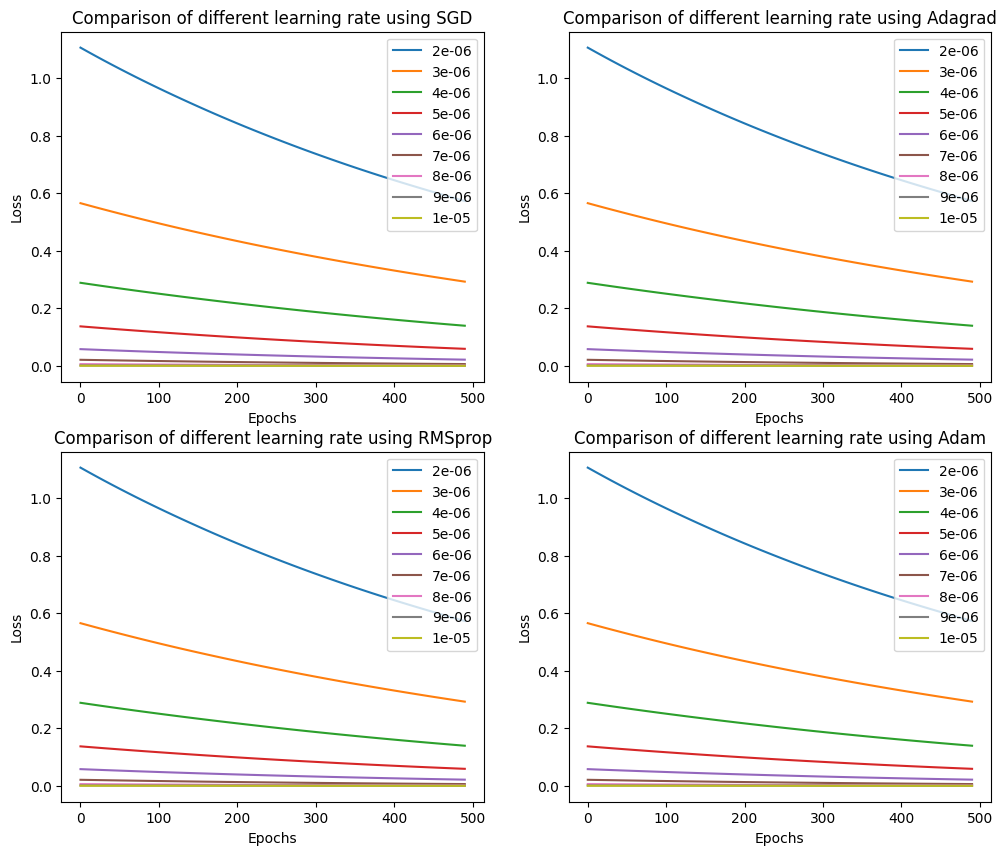

In [143]:
plt.figure(figsize=(12,10))
for opt_id in range(len(optimizer_list)):
    plt.subplot(2,2,opt_id+1)
    for i in range(len(learning_rate_list)):
        plt.plot([x for x in range(0, 500, 10)], loss_list[i], label=learning_rate_list[i])
    plt.legend()
    plt.title(f"Comparison of different learning rate using {optimizer_list_zh[opt_id]}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")